In [1]:
from utils.TimeCorrelationCalculator import TimeCorrelationCalculator
from utils.TimeCorrelationViewer import TimeCorrelationViewer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import utils.sulfur.constant as const

from scipy.stats import ttest_ind, wilcoxon

In [2]:
def means_of_sum_correlation(context_name, start, end):
    column_values = [['engram cells', 'engram cells', 'non-engram cells', 'non-engram cells'], 
                      ['positive', 'negative', 'positive', 'negative']]
    columns = pd.MultiIndex.from_tuples(list(zip(*column_values)))
    df = pd.DataFrame(0.0, columns=columns, index=const.ANIMAL_NAMES)
    for animal_name in const.ANIMAL_NAMES:
        calculator = TimeCorrelationCalculator(animal_name, context_name)
        
        engram_df, non_engram_df = calculator.calc(start=start, end=end)
        
        df.loc[animal_name, ('engram cells', 'positive')]     = engram_df[engram_df > 0.0].sum().mean()
        df.loc[animal_name, ('non-engram cells', 'positive')] = non_engram_df[non_engram_df > 0.0].sum().mean()
        
        df.loc[animal_name, ('engram cells', 'negative')]     = engram_df[engram_df < 0.0].sum().mean()
        df.loc[animal_name, ('non-engram cells', 'negative')] = non_engram_df[non_engram_df < 0.0].sum().mean()
        
    print(df)
    return df

In [3]:
def ratio_of_sum_correlation(df, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(title)
    
    means = df.mean()
    errors = df.sem()
    x = np.arange(0, 1.6, 1.5)
    ax.bar(x=0.0, height=means['non-engram cells'], label='non-engram cells', yerr=errors['non-engram cells'], capsize=2, align='center', color='green')
    ax.bar(x=1.5, height=means['engram cells'], label='engram cells', yerr=errors['engram cells'], capsize=2, align='center', color='orange')
    #ax.bar(x=3.0, height=means['shuffle cells'], label='shuffle cells', yerr=errors['shuffle cells'], capsize=2, align='center', color='royalblue')
    ax.set_xticks(x)
    ax.set_xticklabels(labels=['non-engram cells', 'engram cells'], fontsize=20)
    ax.set_ylabel('ratio of positive sum all correlation', fontsize=20)
    
    for index, row in df.iterrows():
        engram_value = row[0]
        non_engram_value = row[1]
        ax.plot(np.array([0.5, 1.0]), np.array([non_engram_value, engram_value]), marker='x', color='grey')
        #ax.plot(np.array([2.0, 2.5]), np.array([engram_value, shuffle_value]), marker='x', color='grey')
    fig.show()

In [4]:
df_per_context = {}

             engram cells           non-engram cells          
                 positive  negative         positive  negative
ID181106CreA     0.645821 -0.175635         0.711876 -0.001419
ID181106CreB     0.903854 -0.365644         0.871116 -0.007413
ID181106CreC     0.796290 -0.296401         0.544096 -0.007215
ID181106CreG     0.976872 -0.174581         1.079059 -0.000170
ID181106CreH     0.617009 -0.068221         0.634627 -0.001766
ID181106CreI     0.597220 -0.055364         0.542248 -0.004557
ID181106CreK     1.492390 -0.171923         1.490455 -0.000767
ID181106CreL     1.161595 -0.243221         0.711188 -0.001263
ID181106CreN     0.881592 -0.230031         0.622867 -0.001838
ID181106CreQ     1.066323 -0.319447         0.679324 -0.001805


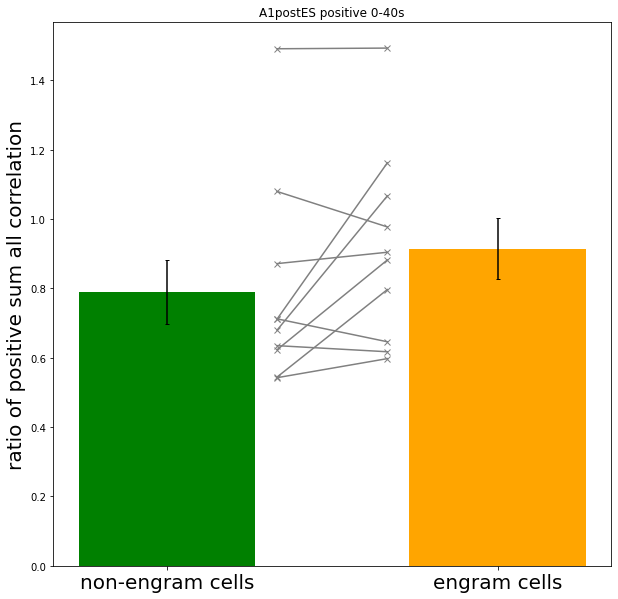

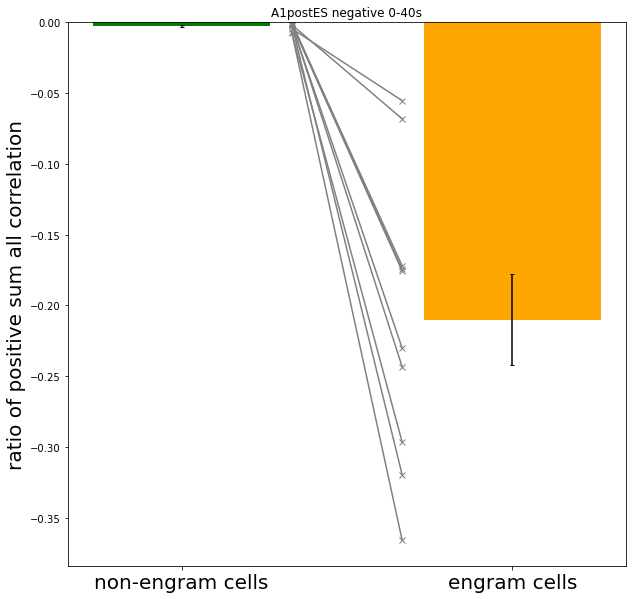

In [5]:
df = means_of_sum_correlation('A1postES', 0, 40)
ratio_of_sum_correlation(df.iloc[:, [0, 2]], 'A1postES positive 0-40s')
ratio_of_sum_correlation(df.iloc[:, [1, 3]], 'A1postES negative 0-40s')
df_per_context['A1postES_0-40'] = df

             engram cells           non-engram cells          
                 positive  negative         positive  negative
ID181106CreA     0.848738 -0.134335         0.775270 -0.000761
ID181106CreB     0.907975 -0.274521         0.629442 -0.008742
ID181106CreC     0.923671 -0.322858         0.619912 -0.008969
ID181106CreG     0.729072 -0.166655         0.543554 -0.002747
ID181106CreH     0.496219 -0.075599         0.558125 -0.002329
ID181106CreI     1.227103 -0.043150         1.028771 -0.003689
ID181106CreK     1.029095 -0.193571         1.480027 -0.000030
ID181106CreL     0.795501 -0.268123         0.571563 -0.002745
ID181106CreN     0.783689 -0.229373         0.869774 -0.000670
ID181106CreQ     0.993806 -0.326564         0.640655 -0.002644


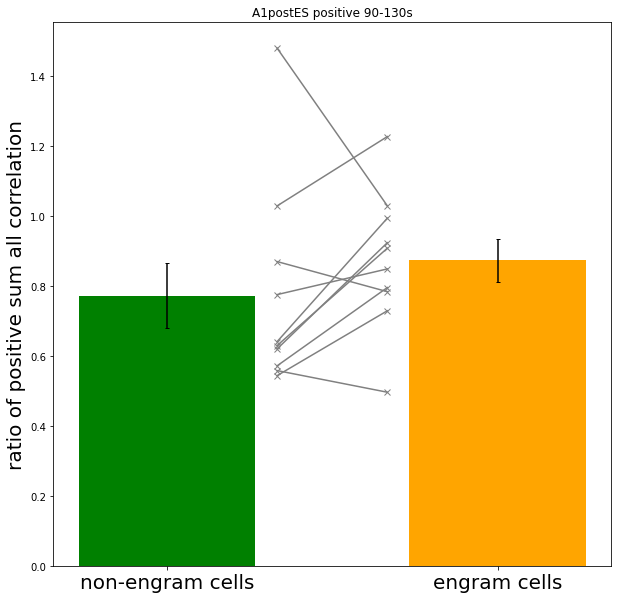

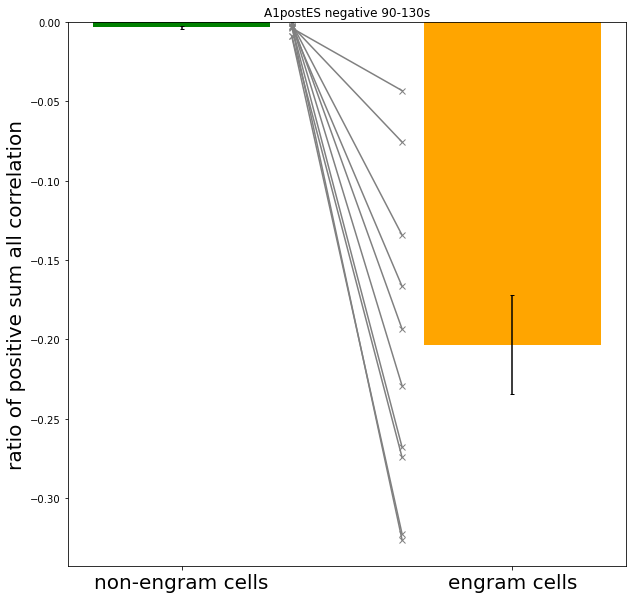

In [6]:
df = means_of_sum_correlation('A1postES', 90, 130)
ratio_of_sum_correlation(df.iloc[:, [0, 2]], 'A1postES positive 90-130s')
ratio_of_sum_correlation(df.iloc[:, [1, 3]], 'A1postES negative 90-130s')
df_per_context['A1postES_90-130'] = df

             engram cells           non-engram cells          
                 positive  negative         positive  negative
ID181106CreA     0.883491 -0.114139         0.739772 -0.001235
ID181106CreB     0.913099 -0.270241         0.614232 -0.009461
ID181106CreC     1.445734 -0.294956         0.739707 -0.006795
ID181106CreG     0.811014 -0.175591         0.697939 -0.002538
ID181106CreH     0.543163 -0.066144         0.619056 -0.002312
ID181106CreI     0.504973 -0.056112         0.560780 -0.003627
ID181106CreK     0.782752 -0.205230         0.883355 -0.000406
ID181106CreL     0.836977 -0.293155         0.529644 -0.003411
ID181106CreN     1.149582 -0.230277         0.974369 -0.000160
ID181106CreQ     0.721266 -0.309090         0.568937 -0.002768


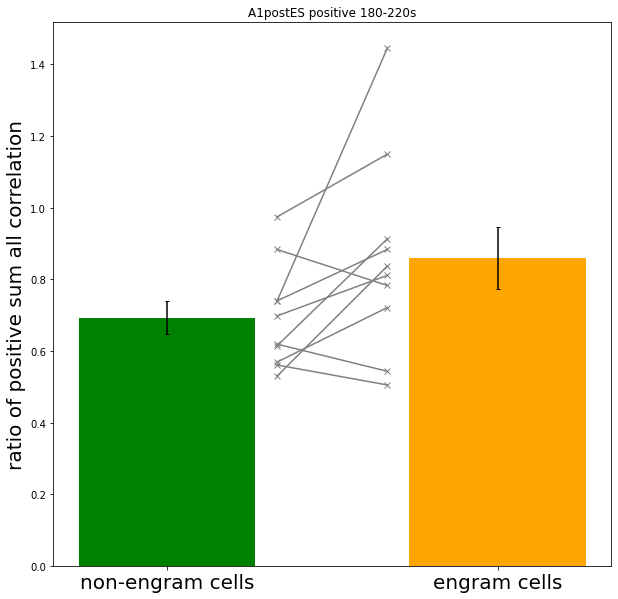

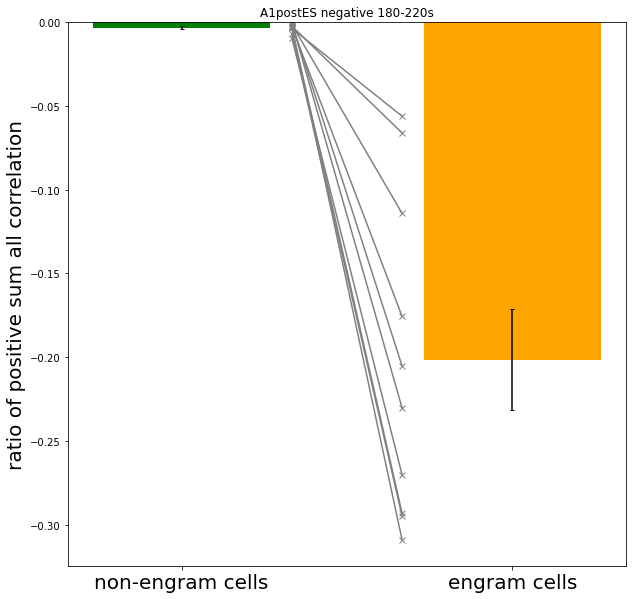

In [7]:
df = means_of_sum_correlation('A1postES', 180, 220)
ratio_of_sum_correlation(df.iloc[:, [0, 2]], 'A1postES positive 180-220s')
ratio_of_sum_correlation(df.iloc[:, [1, 3]], 'A1postES negative 180-220s')
df_per_context['A1postES_180-220'] = df

             engram cells           non-engram cells          
                 positive  negative         positive  negative
ID181106CreA     0.676116 -0.145168         0.521185 -0.002593
ID181106CreB     0.891244 -0.281656         0.676158 -0.007860
ID181106CreC     1.141081 -0.277370         0.669943 -0.006294
ID181106CreG     0.756011 -0.196344         0.980366 -0.001337
ID181106CreH     0.531340 -0.064206         0.543195 -0.003135
ID181106CreI     0.580152 -0.051640         0.528214 -0.006043
ID181106CreK     0.677020 -0.190063         0.550290 -0.002008
ID181106CreL     0.882550 -0.231545         0.601789 -0.001108
ID181106CreN     0.663169 -0.210061         0.473907 -0.002293
ID181106CreQ     0.906436 -0.302866         0.594224 -0.002488


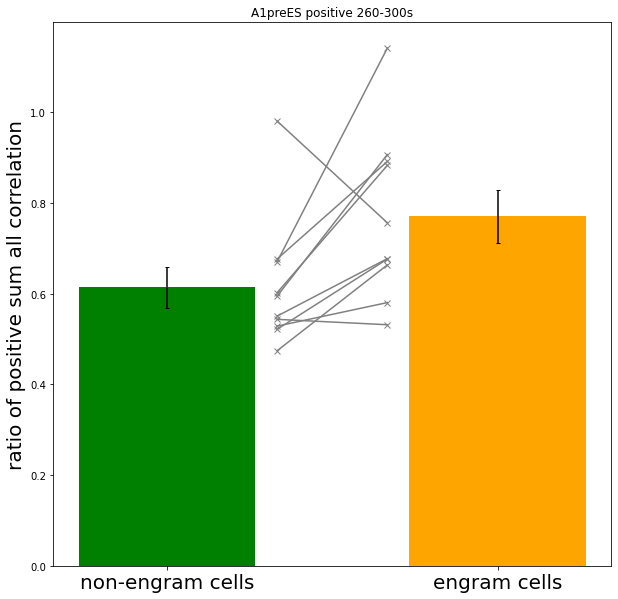

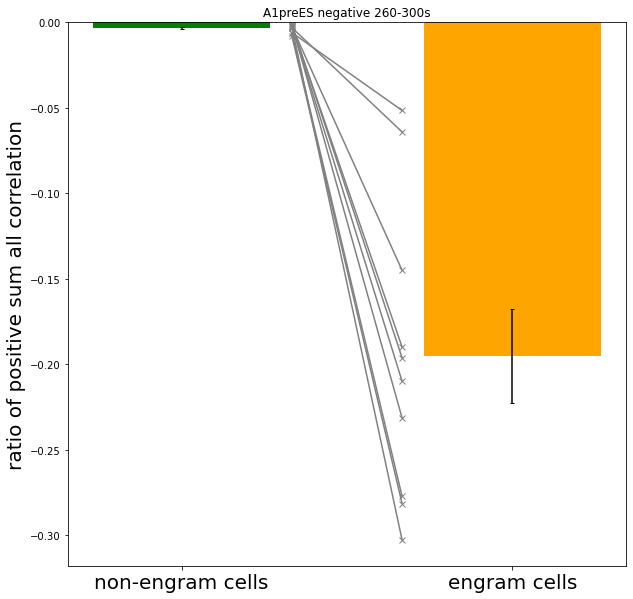

In [8]:
df = means_of_sum_correlation('A1preES', 260, 300)
ratio_of_sum_correlation(df.iloc[:, [0, 2]], 'A1preES positive 260-300s')
ratio_of_sum_correlation(df.iloc[:, [1, 3]], 'A1preES negative 260-300s')
df_per_context['A1preES_260-300'] = df

             engram cells           non-engram cells          
                 positive  negative         positive  negative
ID181106CreA     0.940820 -0.168798         0.599912 -0.002169
ID181106CreB     0.936952 -0.304664         0.887372 -0.003034
ID181106CreC     0.667503 -0.186030         0.638353 -0.006034
ID181106CreG     1.236417 -0.188837         1.088184 -0.000419
ID181106CreH     0.428357 -0.064373         0.374500 -0.003945
ID181106CreI     0.769270 -0.046226         0.597504 -0.003896
ID181106CreK     0.864711 -0.161680         0.543440 -0.001863
ID181106CreL     1.300573 -0.317919         0.794497 -0.000974
ID181106CreN     1.129958 -0.360160         0.916981 -0.000333
ID181106CreQ     1.111841 -0.296142         0.877586 -0.000505
             engram cells           non-engram cells          
                 positive  negative         positive  negative
ID181106CreA     0.832049 -0.167378         0.628110 -0.002152
ID181106CreB     1.103976 -0.296136         0.844951 -0

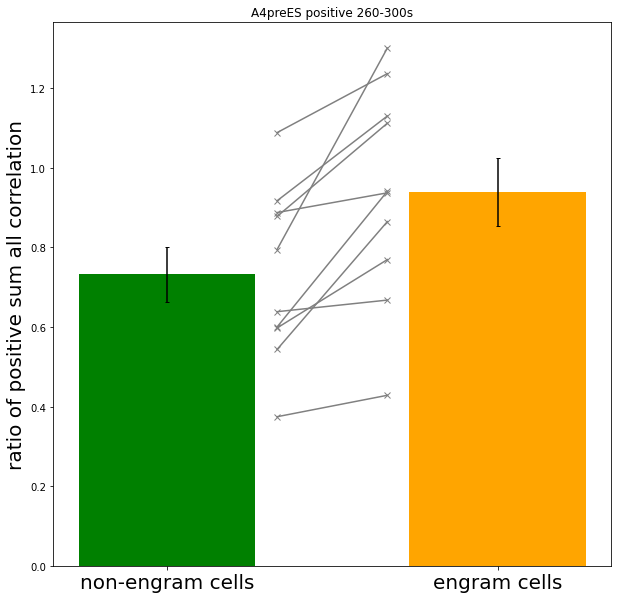

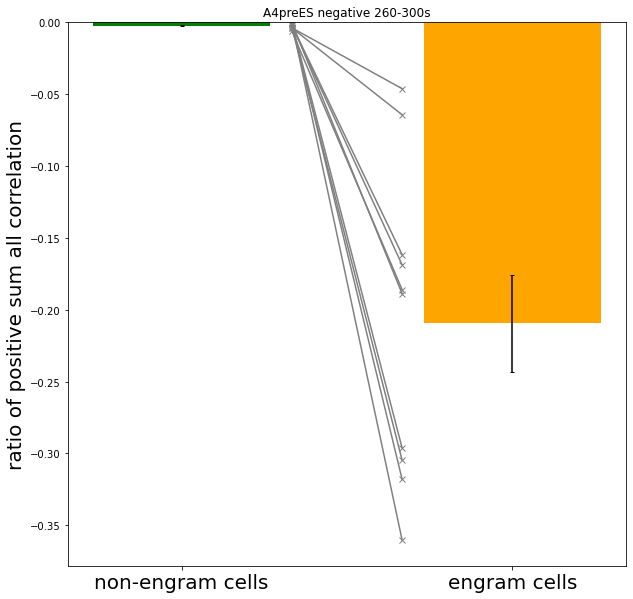

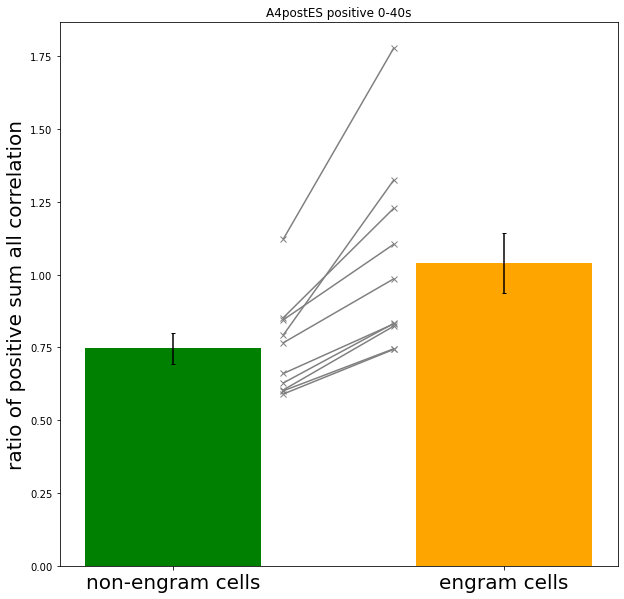

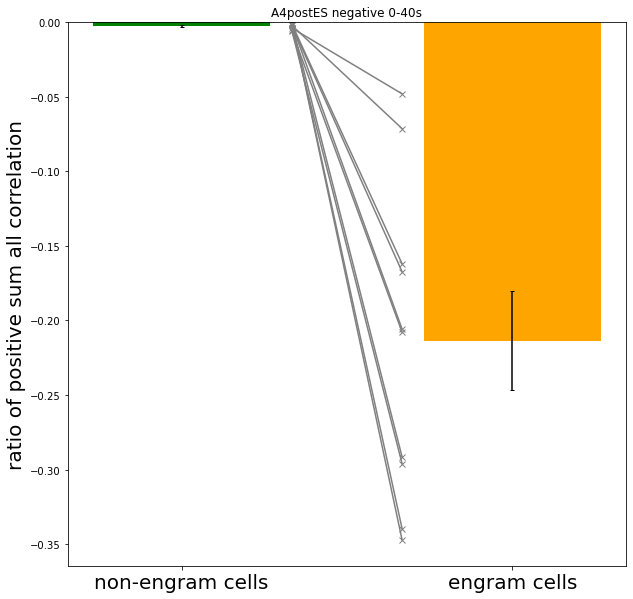

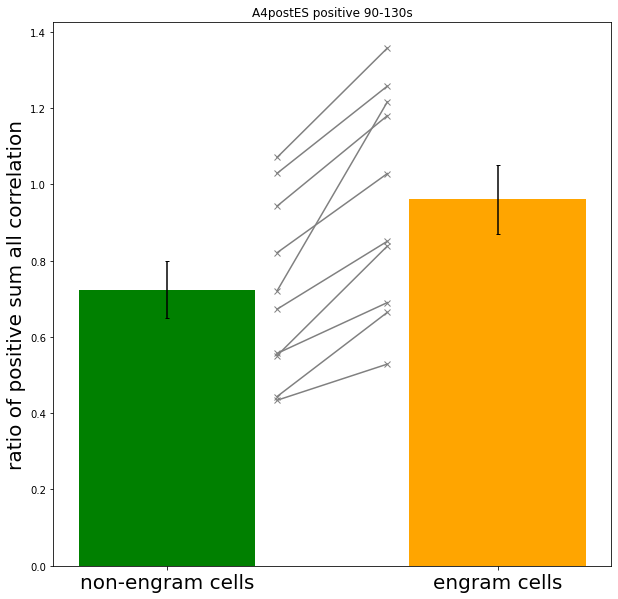

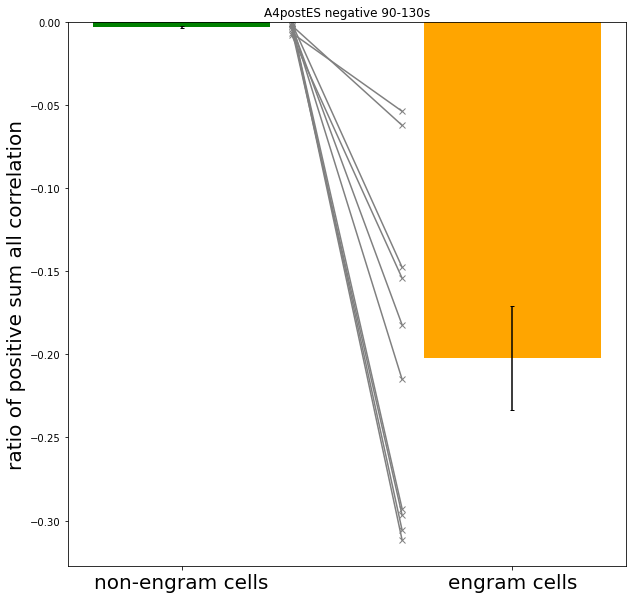

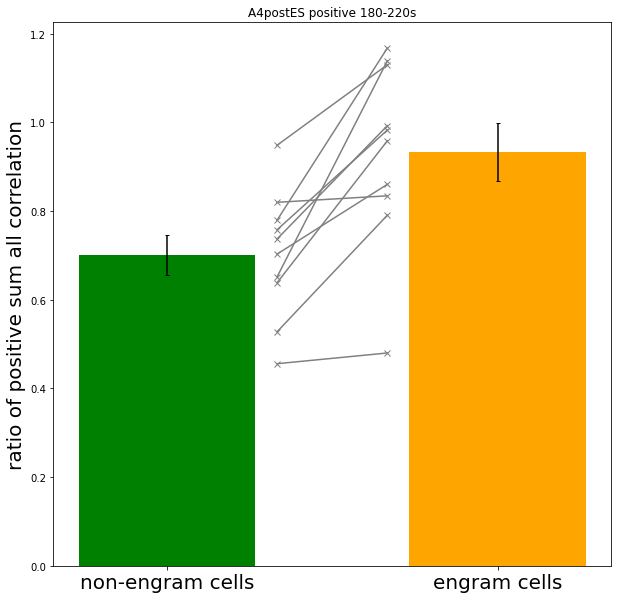

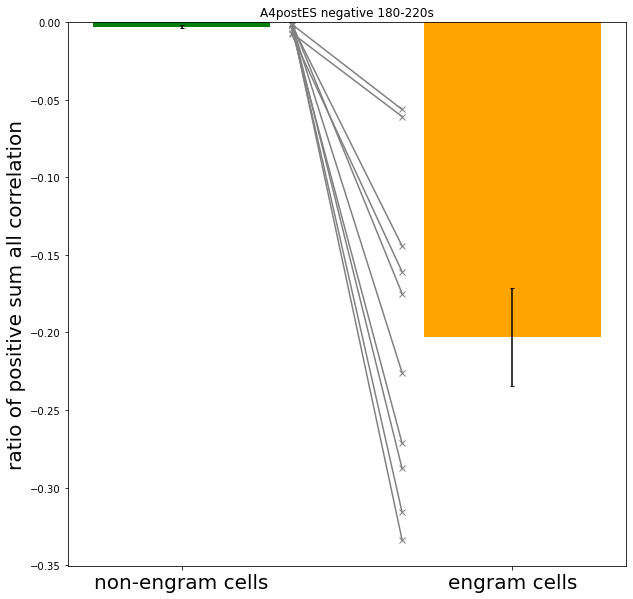

In [9]:
df = means_of_sum_correlation('A4preES', 260, 300)
ratio_of_sum_correlation(df.iloc[:, [0, 2]], 'A4preES positive 260-300s')
ratio_of_sum_correlation(df.iloc[:, [1, 3]], 'A4preES negative 260-300s')
df_per_context['A4preES_260-300'] = df

df = means_of_sum_correlation('A4postES', 0, 40)
ratio_of_sum_correlation(df.iloc[:, [0, 2]], 'A4postES positive 0-40s')
ratio_of_sum_correlation(df.iloc[:, [1, 3]], 'A4postES negative 0-40s')
df_per_context['A4postES_0-40'] = df

df = means_of_sum_correlation('A4postES', 90, 130)
ratio_of_sum_correlation(df.iloc[:, [0, 2]], 'A4postES positive 90-130s')
ratio_of_sum_correlation(df.iloc[:, [1, 3]], 'A4postES negative 90-130s')
df_per_context['A4postES_90-130'] = df

df = means_of_sum_correlation('A4postES', 180, 220)
ratio_of_sum_correlation(df.iloc[:, [0, 2]], 'A4postES positive 180-220s')
ratio_of_sum_correlation(df.iloc[:, [1, 3]], 'A4postES negative 180-220s')
df_per_context['A4postES_180-220'] = df

In [10]:
df_per_context

{'A1postES_0-40':              engram cells           non-engram cells          
                  positive  negative         positive  negative
 ID181106CreA     0.645821 -0.175635         0.711876 -0.001419
 ID181106CreB     0.903854 -0.365644         0.871116 -0.007413
 ID181106CreC     0.796290 -0.296401         0.544096 -0.007215
 ID181106CreG     0.976872 -0.174581         1.079059 -0.000170
 ID181106CreH     0.617009 -0.068221         0.634627 -0.001766
 ID181106CreI     0.597220 -0.055364         0.542248 -0.004557
 ID181106CreK     1.492390 -0.171923         1.490455 -0.000767
 ID181106CreL     1.161595 -0.243221         0.711188 -0.001263
 ID181106CreN     0.881592 -0.230031         0.622867 -0.001838
 ID181106CreQ     1.066323 -0.319447         0.679324 -0.001805,
 'A1postES_90-130':              engram cells           non-engram cells          
                  positive  negative         positive  negative
 ID181106CreA     0.848738 -0.134335         0.775270 -0.000761
 ID

In [12]:
df_index = const.ANIMAL_NAMES
df_columns = ['A1preES_260-300', 'A1postES_0-40', 'A1postES_90-130', 'A1postES_180-220', 'A4preES_260-300', 'A4postES_0-40', 'A4postES_90-130', 'A4postES_180-220']

positive_engram_df = pd.DataFrame(index=df_index, columns=df_columns)
negative_engram_df = pd.DataFrame(index=df_index, columns=df_columns)

for key, df_value in df_per_context.items():
    positive_engram_df.loc[:, key] = df_value.loc[:, ('engram cells', 'positive')]
    negative_engram_df.loc[:, key] = df_value.loc[:, ('engram cells', 'negative')]
    
print(positive_engram_df)
print(negative_engram_df)
#engram_df.to_csv('./sum_correlation_for_engram.csv')

positive_non_engram_df = pd.DataFrame(index=df_index, columns=df_columns)
negative_non_engram_df = pd.DataFrame(index=df_index, columns=df_columns)

for key, df_value in df_per_context.items():
    positive_non_engram_df.loc[:, key] = df_value.loc[:, ('non-engram cells', 'positive')]
    negative_non_engram_df.loc[:, key] = df_value.loc[:, ('non-engram cells', 'negative')]
    
print(positive_non_engram_df)
print(negative_non_engram_df)
#non_engram_df.to_csv('./sum_correlation_for_non_engram.csv')


              A1preES_260-300  A1postES_0-40  A1postES_90-130  \
ID181106CreA         0.676116       0.645821         0.848738   
ID181106CreB         0.891244       0.903854         0.907975   
ID181106CreC         1.141081       0.796290         0.923671   
ID181106CreG         0.756011       0.976872         0.729072   
ID181106CreH         0.531340       0.617009         0.496219   
ID181106CreI         0.580152       0.597220         1.227103   
ID181106CreK         0.677020       1.492390         1.029095   
ID181106CreL         0.882550       1.161595         0.795501   
ID181106CreN         0.663169       0.881592         0.783689   
ID181106CreQ         0.906436       1.066323         0.993806   

              A1postES_180-220  A4preES_260-300  A4postES_0-40  \
ID181106CreA          0.883491         0.940820       0.832049   
ID181106CreB          0.913099         0.936952       1.103976   
ID181106CreC          1.445734         0.667503       0.743146   
ID181106CreG        

<ipython-input-14-239ace19ef62>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['A1pre', 'A1post#1', 'A1post#2', 'A1post#3', 'A4pre', 'A4post#1', 'A4post#2', 'A4post#3'], rotation=45, fontweight='bold')
<ipython-input-14-239ace19ef62>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['A1pre', 'A1post#1', 'A1post#2', 'A1post#3', 'A4pre', 'A4post#1', 'A4post#2', 'A4post#3'], rotation=45, fontweight='bold')


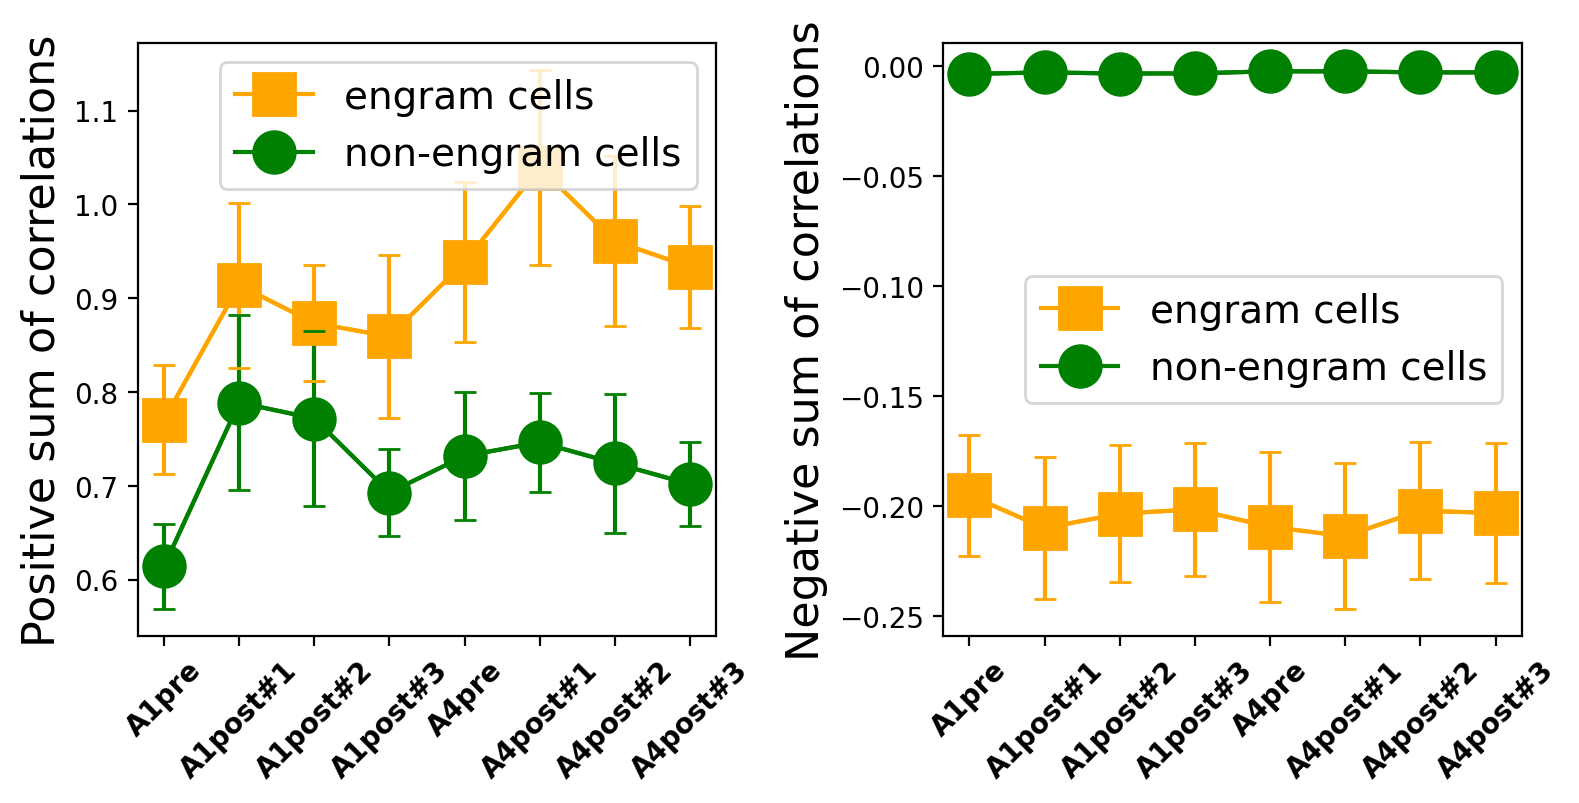

In [14]:
engram_mean = positive_engram_df.mean()
engram_sem = positive_engram_df.sem()
non_engram_mean = positive_non_engram_df.mean()
non_engram_sem = positive_non_engram_df.sem()

negative_engram_mean, negative_engram_sem = negative_engram_df.mean(), negative_engram_df.sem()
negative_non_engram_mean, negative_non_engram_sem = negative_non_engram_df.mean(), negative_non_engram_df.sem()

fig, axes = plt.subplots(ncols=2, figsize=(8, 4), tight_layout=True, dpi=200)

yticks = list(np.arange(0.0, 1.5, 0.10))
axes[0].errorbar(df_columns, engram_mean, yerr=engram_sem, capsize=4, color='orange')
axes[0].plot(df_columns, engram_mean, marker='s', markersize=15, label='engram cells', color='orange')

axes[0].errorbar(df_columns, non_engram_mean, yerr=non_engram_sem, capsize=4, color='green')
axes[0].plot(df_columns, non_engram_mean, marker='o', markersize=15, label='non-engram cells', color='green')

axes[0].set_xticklabels(['A1pre', 'A1post#1', 'A1post#2', 'A1post#3', 'A4pre', 'A4post#1', 'A4post#2', 'A4post#3'], rotation=45, fontweight='bold')
axes[0].set_ylabel('Positive sum of correlations', fontsize=16)
axes[0].legend(fontsize=14)


axes[1].errorbar(df_columns, negative_engram_mean, yerr=negative_engram_sem, capsize=4, color='orange')
axes[1].plot(df_columns, negative_engram_mean, marker='s', markersize=15, label='engram cells', color='orange')

axes[1].errorbar(df_columns, negative_non_engram_mean, yerr=negative_non_engram_sem, capsize=4, color='green')
axes[1].plot(df_columns, negative_non_engram_mean, marker='o', markersize=15, label='non-engram cells', color='green')

axes[1].set_xticklabels(['A1pre', 'A1post#1', 'A1post#2', 'A1post#3', 'A4pre', 'A4post#1', 'A4post#2', 'A4post#3'], rotation=45, fontweight='bold')
axes[1].set_ylabel('Negative sum of correlations', fontsize=16)
axes[1].legend(fontsize=14)

fig.show()

In [ ]:
_, pvalue = wilcoxon(engram_df.loc[:, 'A1preES_260-300'], engram_df.loc[:, 'A1postES_0-40'])
pvalue